In [17]:
import json
import pandas as pd
from PIL import Image, ImageDraw

# "TableBank_data/Detection_data/Word/Word.json"
with open("TableBank_data/Detection_data/Latex/Latex.json", "r") as file:
    data = json.load(file)

In [18]:
df_annot = pd.DataFrame(data['annotations'])
df_images = pd.DataFrame(data['images'])
#df_images.columns = ['file_name', 'width', 'image_id', 'height', 'license'] # word
df_images.columns = ['file_name', 'image_id', 'license', 'width', 'height'] # latex
print(df_annot.shape, df_images.shape)

(253817, 7) (200183, 5)


In [19]:
df = pd.merge(df_images, df_annot, on='image_id')[['image_id', 'file_name', 'height', 'width', 'bbox']]
df.shape

(253817, 5)

In [20]:
for image in df['file_name'].values:
    loc_df = df[df['file_name']==image]
    assert len(loc_df) != 0
    width, height = loc_df['width'].values[0], loc_df['height'].values[0]
    template = '''
            <annotation>
              <filename>%(item)s</filename>
              <size>
                <width>%(width)s</width>
                <height>%(height)s</height>
                <depth>3</depth>
              </size>
              <segmented>0</segmented>'''%{
                'item': image,
                'width': width,
                'height': height,}
    
    for bbox in loc_df['bbox']:
        xmin, ymin, dx, dy = bbox
        xmax = xmin + dx
        ymax = ymin + dy
        template += '''
              <object>
                <name>table</name>
                <bndbox>
                  <xmin>%(xmin)s</xmin>
                  <ymin>%(ymin)s</ymin>
                  <xmax>%(xmax)s</xmax>
                  <ymax>%(ymax)s</ymax>
                </bndbox>
              </object>
              '''%{
                'xmin': xmin,
                'ymin': ymin,
                'xmax': xmax,
                'ymax': ymax,
                }
    template += '</annotation>'
    template = template.replace('&', '&amp;')
    with open('data_dir/annotations/xmls/'+image[:-4]+'.xml', 'w') as outfile:
        outfile.write(template)

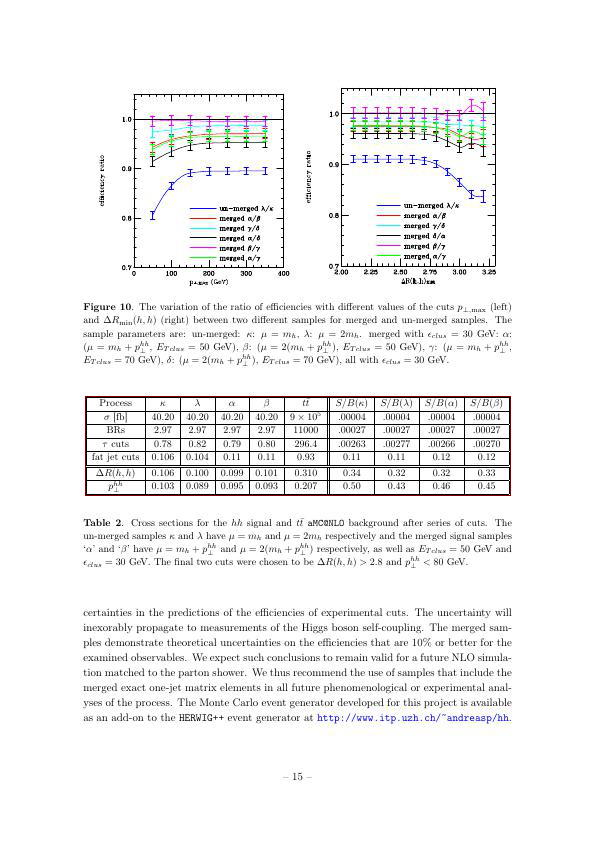

In [8]:
im = Image.open('TableBank_data/Detection_data/Latex/images/1401.0007_15.jpg')
draw = ImageDraw.Draw(im)
xmin, ymin, dx, dy = [85, 396, 425, 99]
xmax = xmin + dx
ymax = ymin + dy
draw.line((xmin, ymin) + (xmin, ymax), fill=128)
draw.line((xmin, ymin) + (xmax, ymin), fill=128)
draw.line((xmax, ymax) + (xmin, ymax), fill=128)
draw.line((xmax, ymax) + (xmax, ymin), fill=128)
im

In [4]:
import os
items = [ x[:-4] for x in os.listdir('TableBank_data/Detection_data/Word/images') if x[-4:]=='.jpg'] + \
        [ x[:-4] for x in os.listdir('TableBank_data/Detection_data/Latex/images') if x[-4:]=='.jpg']

In [11]:
with open('data_dir/annotations/trainval.txt', 'w') as outfile:
    outfile.write('\n'.join(items))